In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

dat = pd.read_csv("meteo_nogal_09.csv", engine="python")
dat.head()


,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dat1=pd.DataFrame(dat)

In [3]:
dat1.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Eliminamos las columnas nombradas 'unnamed'. 
dat1=dat1.drop(dat1.columns[dat1.columns.str.contains('unnamed:',case = False)],axis = 1)

dat1.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [5]:
#Creamos la variable FECHA a partir de DATE y TIME. Desechamos dichas columnas.
dat1["FECHA"] = dat1["DATE"] + " "+ dat1["TIME"]
dat1.drop( ["DATE","TIME"], axis=1, inplace=True )
dat1.head()


,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3,NaN
1,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
2,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
3,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
4,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40


In [6]:
#Quitamos el renglón con las unidades de cada variable
dat1 = dat1.drop(dat1.index[0])
dat1.reset_index(drop=True)
dat1.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
1,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
2,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
3,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
4,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40
5,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,01-01-09 00:50


In [7]:
#Convertimos las variables object a float64 para poder operar con los números
dat1[dat1.columns[0:14]] = dat1[dat1.columns[0:14]].apply(pd.to_numeric, errors='coerce')
dat1.dtypes

u_Avg          float64
v_Avg          float64
w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
FECHA           object
dtype: object

In [8]:
#Empleamos la función corr para encontrar las correlaciones entre cada variable
#Creamos un nuevo data frame a partir de las correlaciones
dat1_corr = dat1.corr(method='pearson', min_periods=1)
dat1_corr.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241773,0.028537,0.058863,-0.047981,-0.093187,0.089411,0.003093,-0.138616,-0.363807,0.326205,-0.372100,0.107109,0.173845
v_Avg,0.241773,1.000000,0.016387,0.019921,0.153061,-0.116671,0.029321,-0.053957,-0.075175,-0.341920,0.099303,-0.346782,-0.103330,-0.189840
w_Avg,0.028537,0.016387,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133
t_Avg,0.058863,0.019921,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896
kh20_Avg,-0.047981,0.153061,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760


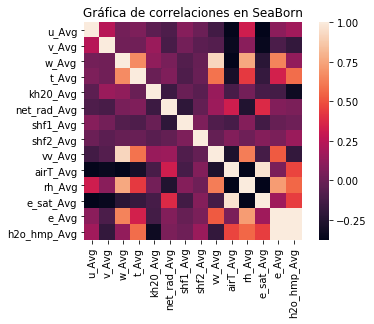

In [9]:
#Elaboramos una gráfica de correlaciones con la biblioteca de SeaBorn
corr_sns = sb.heatmap(dat1_corr,robust=True,square=True,annot=False)
corr_sns.set_title("Gráfica de correlaciones en SeaBorn") 
fig = corr_sns.get_figure()
fig.savefig("correlaciones_sns",plt=2000)
plt.show()

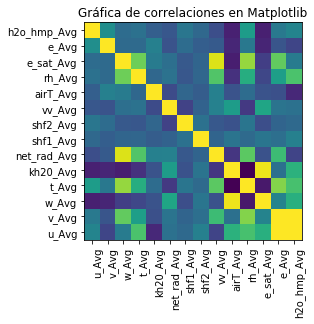

In [10]:
#Elaboramos la misma gráfica de correlaciones, ahora con Matplotlib.

#Creamos un gráfico vacío
fig, corr_mat = plt.subplots()                    

#Establecemos el tamaño de los ejes.
corr_mat.set_xticks(np.arange(len(dat1_corr)))      
corr_mat.set_yticks(np.arange(len(dat1_corr)))

#Agregamos los nombres de cada variable en los ejes.
corr_mat.set_xticklabels(dat1_corr)                 
corr_mat.set_yticklabels(dat1_corr.columns[::-1])

#Rotamos 90° las etiquetas en el eje x
plt.setp(corr_mat.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

#Graficamos las correlaciones
plt.imshow(dat1_corr,cmap='viridis', interpolation='nearest')


corr_mat.set_title("Gráfica de correlaciones en Matplotlib")   
plt.savefig('correlaciones_mpltlib',plt=2000) 
plt.show()

In [11]:
#A paritr del data frame de corrrelaciones, relizaremos gráficas de aquellas correlaciones cuyo 
# valor absoluto es mayor a 0.6
dat1_corr

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241773,0.028537,0.058863,-0.047981,-0.093187,0.089411,0.003093,-0.138616,-0.363807,0.326205,-0.372100,0.107109,0.173845
v_Avg,0.241773,1.000000,0.016387,0.019921,0.153061,-0.116671,0.029321,-0.053957,-0.075175,-0.341920,0.099303,-0.346782,-0.103330,-0.189840
w_Avg,0.028537,0.016387,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133
t_Avg,0.058863,0.019921,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896
kh20_Avg,-0.047981,0.153061,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760
net_rad_Avg,-0.093187,-0.116671,0.044286,0.064174,-0.157635,1.000000,-0.206065,-0.027180,0.156017,0.326684,-0.254705,0.381454,0.076382,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003093,-0.053957,-0.011563,-0.008491,-0.058466,-0.027180,0.059003,1.000000,-0.017869,0.077130,0.014974,0.081516,0.048861,0.151206
vv_Avg,-0.138616,-0.075175,0.923685,0.593997,0.149991,0.156017,-0.089608,-0.017869,1.000000,-0.264771,0.624201,-0.125826,0.525220,-0.193064
airT_Avg,-0.363807,-0.341920,-0.374504,-0.288852,-0.116329,0.326684,-0.121637,0.077130,-0.264771,1.000000,-0.501728,0.963527,0.050730,0.464621


In [12]:
#Las correlaciones que cumplen con la condición dada son:

# t_Avg - w_Avg            corr = 0.667294  
# w_Avg - e_Avg            corr = 0.641772  
# vv_Avg - w_Avg           corr = 0.923685  
# airT_Avg - e_sat_Avg     corr = 0.963527   
# rh_Avg - w_Avg           corr = 0.760058  
# rh_Avg - vv_Avg          corr = 0.624201  
# e_Avg - rh_Avg           corr = 0.722503   
#h20_hmp_Avg - e_Avg       corr = 0.999154  
  
  



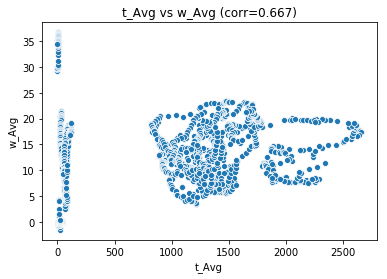

In [13]:
#t_Avg - w_Avg
sns_plot = sb.scatterplot(x=dat1['t_Avg'],y=dat1['w_Avg'])
fig = sns_plot.get_figure()
plt.title("t_Avg vs w_Avg (corr=0.667)")
fig.savefig("corr1",plt=2000)
plt.show()

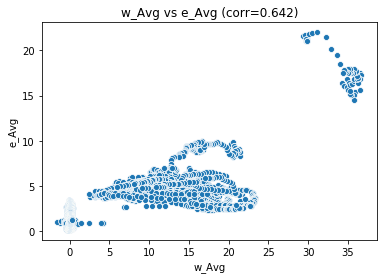

In [14]:
# w_Avg - e_Avg
sns_plot = sb.scatterplot(x=dat1['w_Avg'],y=dat1['e_Avg'])
fig = sns_plot.get_figure()
plt.title("w_Avg vs e_Avg (corr=0.642)")
fig.savefig("corr3",plt=2000)
plt.show()

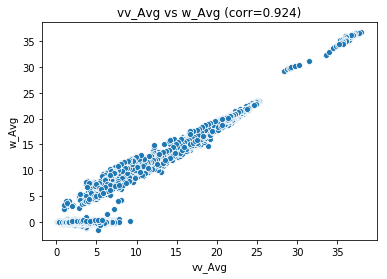

In [15]:
# vv_Avg - w_Avg
sns_plot = sb.scatterplot(x=dat1['vv_Avg'],y=dat1['w_Avg'])
fig = sns_plot.get_figure()
plt.title("vv_Avg vs w_Avg (corr=0.924)")
fig.savefig("corr4",plt=2000)
plt.show()

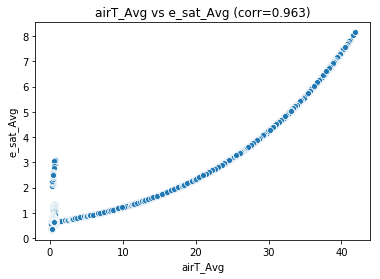

In [16]:
# airT_Avg - e_sat_Avg  
sns_plot = sb.scatterplot(x=dat1['airT_Avg'],y=dat1['e_sat_Avg'])
fig = sns_plot.get_figure()
plt.title("airT_Avg vs e_sat_Avg (corr=0.963)")
fig.savefig("corr6",plt=2000)
plt.show()

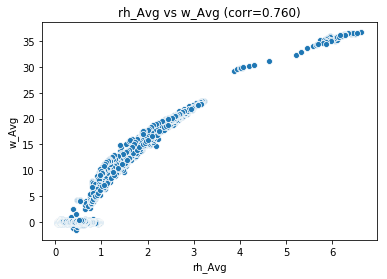

In [17]:
# rh_Avg - w_Avg   
sns_plot = sb.scatterplot(x=dat1['rh_Avg'],y=dat1['w_Avg'])
fig = sns_plot.get_figure()
plt.title("rh_Avg vs w_Avg (corr=0.760)")
fig.savefig("corr7",plt=2000)
plt.show()

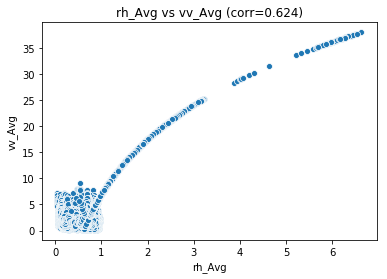

In [18]:
# rh_Avg - vv_Avg 
sns_plot = sb.scatterplot(x=dat1['rh_Avg'],y=dat1['vv_Avg'])
fig = sns_plot.get_figure()
plt.title("rh_Avg vs vv_Avg (corr=0.624)")
fig.savefig("corr8",plt=2000)
plt.show()

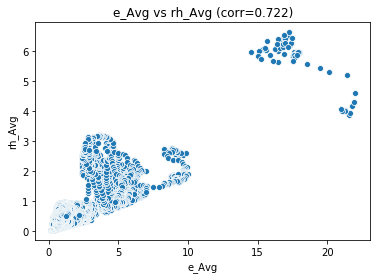

In [19]:
# e_Avg - rh_Avg
sns_plot = sb.scatterplot(x=dat1['e_Avg'],y=dat1['rh_Avg'])
fig = sns_plot.get_figure()
plt.title("e_Avg vs rh_Avg (corr=0.722)")
fig.savefig("corr10",plt=2000)
plt.show()

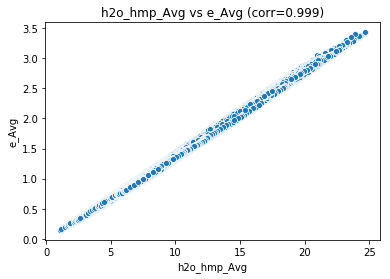

In [20]:
#h2o_hmp_Avg - e_Avg
sns_plot = sb.scatterplot(x=dat1['h2o_hmp_Avg'],y=dat1['e_Avg'])
fig = sns_plot.get_figure()
plt.title("h2o_hmp_Avg vs e_Avg (corr=0.999)")
fig.savefig("corr11",plt=2000)
plt.show()